In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [15]:
tools=["optitype",'T1K','hlahd','hisat',"arcas",'rna2hla',"seq2hla","hlaforest","phlat","hlavbseq",'hlaminer']
my_order=["Optitype","T1K","HLA-HD","HISAT","arcasHLA","RNA2HLA","seq2HLA","HLAforest","PHLAT","HLA-vbseq",'HLAminer']

In [25]:
rawdata = list()

#datasets=["1","d2","d3","d4","d5","d6"]
for t in tools:
    total = []
    for d in range(1,7):
        gs=pd.read_csv("../datasets/"+str(d)+"_gs.csv")
        pre=pd.read_csv("../results/standard/"+str(t)+"_d"+str(d)+".csv")
            
        ret=get_accuracy_counts(pre,gs)
        print(t,"d"+str(d),ret)
        total.append(ret)
    rawdata.append(total)

optitype d1 ([10, 0], [33, 0], [2897, 0], [0, 1960])
optitype d2 ([0, 0], [0, 0], [0, 0], [0, 172])
optitype d3 ([8, 0], [10, 0], [282, 0], [0, 0])
optitype d4 ([0, 0], [0, 0], [0, 0], [0, 28])
optitype d5 ([0, 0], [0, 0], [8, 0], [0, 0])
optitype d6 ([0, 0], [0, 0], [4, 0], [0, 0])
T1K d1 ([13, 7], [43, 92], [2884, 1861], [0, 0])
T1K d2 ([0, 4], [0, 5], [0, 163], [0, 0])
T1K d3 ([12, 0], [80, 0], [208, 0], [0, 0])
T1K d4 ([0, 9], [0, 1], [0, 18], [0, 0])
T1K d5 ([0, 0], [0, 0], [8, 0], [0, 0])
T1K d6 ([0, 0], [0, 0], [4, 0], [0, 0])
hlahd d1 ([34, 15], [104, 82], [2802, 1863], [0, 0])
hlahd d2 ([0, 4], [0, 5], [0, 163], [0, 0])
hlahd d3 ([15, 0], [90, 0], [195, 0], [0, 0])
hlahd d4 ([0, 6], [0, 1], [0, 11], [0, 10])
hlahd d5 ([0, 0], [0, 0], [8, 0], [0, 0])
hlahd d6 ([0, 0], [0, 0], [4, 0], [0, 0])
hisat d1 ([68, 32], [56, 100], [2816, 1828], [0, 0])
hisat d2 ([0, 5], [0, 7], [0, 160], [0, 0])
hisat d3 ([27, 0], [67, 0], [206, 0], [0, 0])
hisat d4 ([0, 10], [0, 0], [0, 10], [0, 8])
hi

# Plotting

In [26]:
font = {'size'   : 1}

mpl.rcParams["font.size"] = 18

## Bar plot of accuracy with no calls included

In [27]:
# Calculating Class I and Class II Accuracy -- NO CALLS INCLUDED
data = np.array(rawdata)

classIresults = []
classIIresults = []
allresults = []

for tool in data:
    r = np.sum(np.array(tool),axis=0)
    allresults.append(r[:,0]+r[:,1])
    classIresults.append(r[:,0])
    classIIresults.append(r[:,1])

# normalizing accuracies to 1
classIresults = np.array(classIresults)
row_sums = classIresults.sum(axis=1)
classIresults = classIresults / row_sums[:, np.newaxis]


classIIresults = np.array(classIIresults)
row_sums = classIIresults.sum(axis=1)
classIIresults = classIIresults / row_sums[:, np.newaxis]

allresults = np.array(allresults)
row_sums = allresults.sum(axis=1)
allresults = allresults / row_sums[:, np.newaxis]


print(classIresults)
print(classIIresults)
print(allresults)

[[0.00553506 0.01322263 0.98124231 0.        ]
 [0.00768758 0.03782288 0.95448954 0.        ]
 [0.01506765 0.0596556  0.92527675 0.        ]
 [0.02921279 0.03782288 0.93296433 0.        ]
 [0.01445264 0.07134071 0.91420664 0.        ]
 [0.01506765 0.04059041 0.94434194 0.        ]
 [0.01506765 0.04059041 0.94434194 0.        ]
 [0.03444034 0.16389914 0.80166052 0.        ]
 [0.0304428  0.09563346 0.87392374 0.        ]
 [0.09717097 0.07533825 0.82749077 0.        ]
 [0.79735547 0.13284133 0.06303813 0.00676507]]
[[0.         0.         0.         1.        ]
 [0.00925926 0.04537037 0.94537037 0.        ]
 [0.01157407 0.04074074 0.94305556 0.00462963]
 [0.02175926 0.04953704 0.925      0.0037037 ]
 [0.00462963 0.06111111 0.92314815 0.01111111]
 [0.06898148 0.10185185 0.82916667 0.        ]
 [0.08796296 0.09768519 0.8125     0.00185185]
 [0.02546296 0.12037037 0.85231481 0.00185185]
 [0.19305556 0.06944444 0.73101852 0.00648148]
 [0.91527778 0.01805556 0.06388889 0.00277778]
 [0.65972222

        Tools      zero  two dig accuracy  four dig accuracy
0    optitype  0.003326          0.007945           0.589616
1         T1K  0.008315          0.040835           0.950850
2       hlahd  0.013673          0.052106           0.932373
3       hisat  0.026238          0.042498           0.929786
4       arcas  0.010532          0.067258           0.917775
5     rna2hla  0.036585          0.065041           0.898374
6     seq2hla  0.044161          0.063378           0.891722
7   hlaforest  0.030857          0.146526           0.821877
8       phlat  0.095344          0.085181           0.816888
9    hlavbseq  0.423688          0.052476           0.522727
10   hlaminer  0.742424          0.166112           0.078344


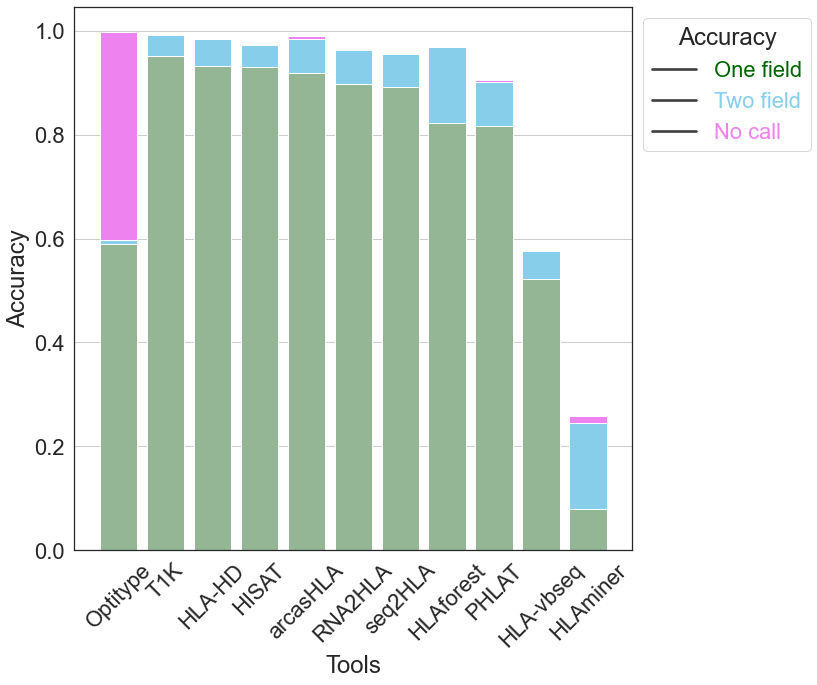

In [29]:
# combined accuracy bar plot (not split by class 1 and class 2) -- NO CALLS INCLUDED

combined_df = pd.DataFrame({'Tools': tools, 'zero': allresults[:, 0],'two dig accuracy': allresults[:, 1],'four dig accuracy': allresults[:, 2]})
print(combined_df)

sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.set_style("white")
plt.grid()

ax = sns.barplot(data=combined_df,x='Tools',y='four dig accuracy',color = "darkseagreen")
ax.bar(tools,allresults[:, 1],bottom=allresults[:, 2], color='skyblue')
ax.bar(tools,allresults[:, 3],bottom=allresults[:, 2]+allresults[:, 1], color='violet')


ax.set_xticklabels(labels=my_order, rotation = 45)
ax.set_ylabel("Accuracy")
plt.legend(title='Accuracy', loc='upper left', labels=['One field', 'Two field','No call'], labelcolor=['darkgreen','skyblue','violet'],bbox_to_anchor=(1,1))

## Bar plot of accuracy with no calls EXcluded

In [8]:
# Calculating Class I and Class II Accuracy -- NO CALLS excluded
data = np.array(rawdata)
subset_data = data[:,:,:3]

classIresults = []
classIIresults = []
allresults = []

for tool in subset_data:
    r = np.sum(np.array(tool),axis=0)
    allresults.append(r[:,0]+r[:,1])
    classIresults.append(r[:,0])
    classIIresults.append(r[:,1])

# normalizing accuracies to 1
classIresults = np.array(classIresults)
row_sums = classIresults.sum(axis=1)
classIresults = classIresults / row_sums[:, np.newaxis]


classIIresults = np.array(classIIresults)
row_sums = classIIresults.sum(axis=1)
classIIresults = classIIresults / row_sums[:, np.newaxis]

allresults = np.array(allresults)
row_sums = allresults.sum(axis=1)
allresults = allresults / row_sums[:, np.newaxis]


print(classIresults)
print(classIIresults)
print(allresults)

[[0.00553506 0.01322263 0.98124231]
 [0.00768758 0.03782288 0.95448954]
 [0.01506765 0.0596556  0.92527675]
 [0.02921279 0.03782288 0.93296433]
 [0.01445264 0.07134071 0.91420664]
 [0.01506765 0.04059041 0.94434194]
 [0.01506765 0.04059041 0.94434194]
 [0.03444034 0.16389914 0.80166052]
 [0.0304428  0.09563346 0.87392374]
 [0.09717097 0.07533825 0.82749077]
 [0.80278638 0.13374613 0.06346749]]
[[       nan        nan        nan]
 [0.00925926 0.04537037 0.94537037]
 [0.01162791 0.04093023 0.94744186]
 [0.02184015 0.04972119 0.92843866]
 [0.00468165 0.06179775 0.9335206 ]
 [0.06898148 0.10185185 0.82916667]
 [0.08812616 0.09786642 0.81400742]
 [0.0255102  0.12059369 0.8538961 ]
 [0.194315   0.06989748 0.73578751]
 [0.9178273  0.01810585 0.06406685]
 [0.67503553 0.22122217 0.1037423 ]]
[[0.00553506 0.01322263 0.98124231]
 [0.00831486 0.04083518 0.95084996]
 [0.01369863 0.05220289 0.93409848]
 [0.02627683 0.04256107 0.9311621 ]
 [0.01057906 0.06755754 0.9218634 ]
 [0.03658537 0.06504065 0.

/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_10091/2206183277.py:23: RuntimeWarning: invalid value encountered in true_divide
  classIIresults = classIIresults / row_sums[:, np.newaxis]


        Tools      zero  two dig accuracy  four dig accuracy
0    optitype  0.003326          0.007945           0.589616
1         T1K  0.008315          0.040835           0.950850
2       hlahd  0.013673          0.052106           0.932373
3       hisat  0.026238          0.042498           0.929786
4       arcas  0.010532          0.067258           0.917775
5     rna2hla  0.036585          0.065041           0.898374
6     seq2hla  0.044161          0.063378           0.891722
7   hlaforest  0.030857          0.146526           0.821877
8       phlat  0.095344          0.085181           0.816888
9    hlavbseq  0.423688          0.052476           0.522727
10   hlaminer  0.742424          0.166112           0.078344


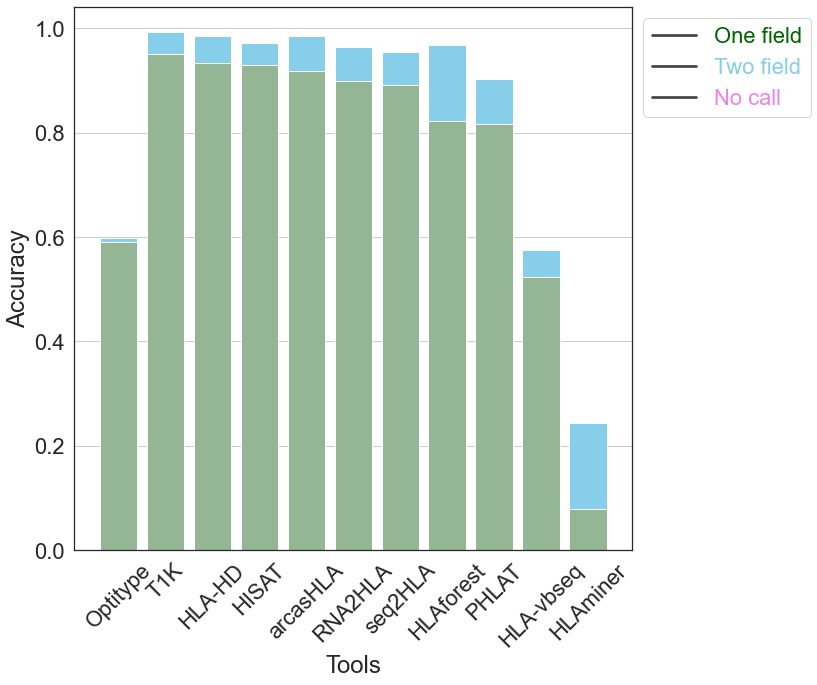

In [30]:
# combined accuracy bar plot (not split by class 1 and class 2) -- NO CALLS EXCLUDED

combined_df = pd.DataFrame({'Tools': tools, 'zero': allresults[:, 0],'two dig accuracy': allresults[:, 1],'four dig accuracy': allresults[:, 2]})
print(combined_df)

sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.set_style("white")
plt.grid()

ax = sns.barplot(data=combined_df,x='Tools',y='four dig accuracy',color = "darkseagreen")
ax.bar(tools,allresults[:, 1],bottom=allresults[:, 2], color='skyblue')


ax.set_xticklabels(labels=my_order, rotation = 45)
ax.set_ylabel("Accuracy")
plt.legend(loc='upper left', labels=['One field', 'Two field','No call'], labelcolor=['darkgreen','skyblue','violet'],bbox_to_anchor=(1,1))

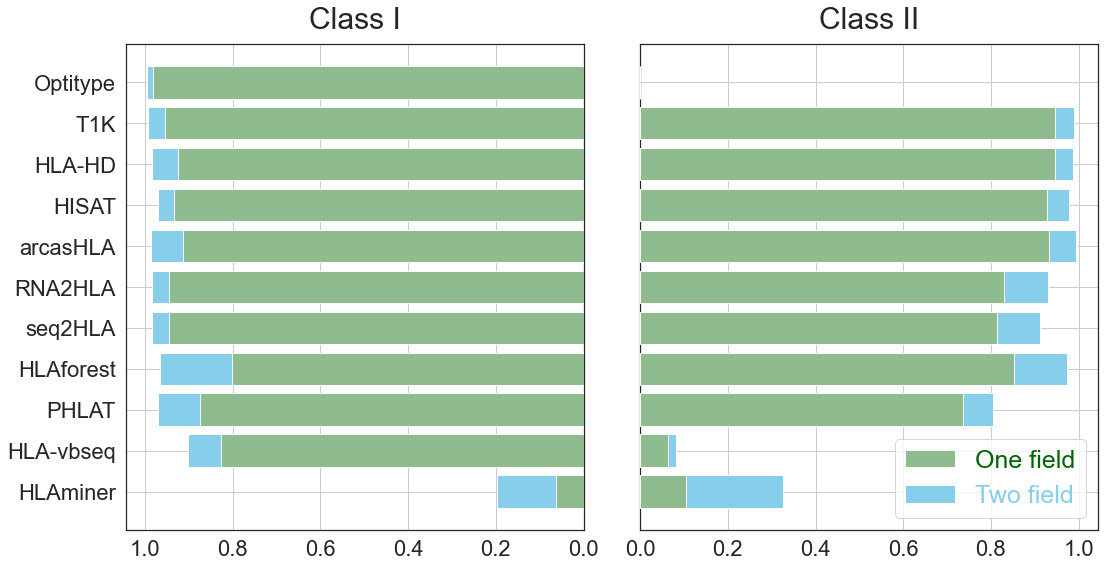

In [21]:
# (OLD) class1 vs class2 barplot for 4 dig accuracy

title0 = 'Class I'
title1 = 'Class II'

fourdig_I = classIresults[:,2]
fourdig_II = classIIresults[:,2]

twodig_I = classIresults[:,1]
twodig_II = classIIresults[:,1]

# need to set optitype to zero for class II
twodig_II[0]=0
fourdig_II[0]=0


fig, axes = plt.subplots(figsize=(15,8),  ncols=2, sharey=True)
fig.tight_layout()


axes[0].barh(my_order, fourdig_I, align='center',zorder=10,color = "darkseagreen")
axes[0].barh(my_order,twodig_I,left=fourdig_I, color='skyblue')
axes[0].set_title(title0, fontsize=30, pad=15)
axes[1].barh(my_order,  fourdig_II, align='center', zorder=10,color = "darkseagreen")
axes[1].barh(my_order,twodig_II,left=fourdig_II, color = 'skyblue')
axes[1].set_title(title1, fontsize=30, pad=15)


axes[0].grid(zorder=0)
axes[1].grid(zorder=0)

axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

axes[1].legend(labels=['One field', 'Two field'], labelcolor=['darkgreen','skyblue'],fontsize=25)



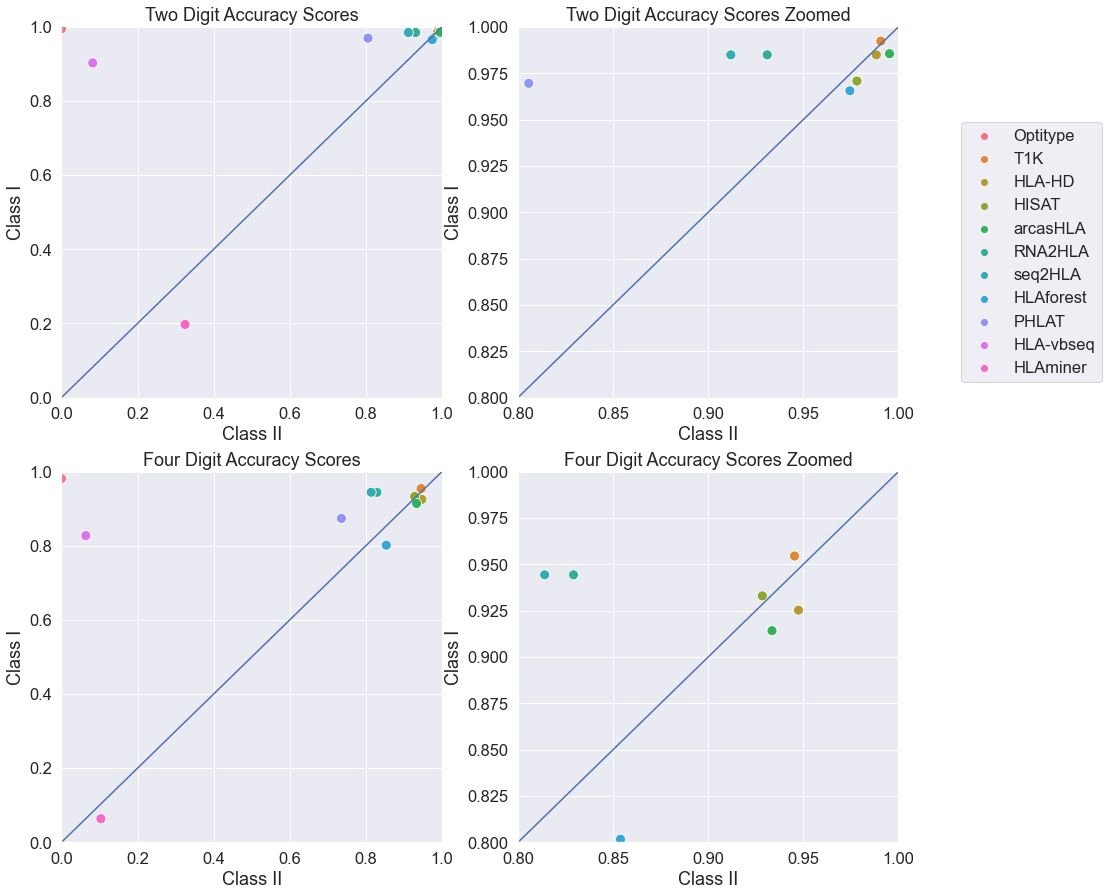

In [23]:
# class1 vs class2 scatterplot for 2 and 4 dig accuracy -- No call excluded


sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=1.5)


fig, ax = plt.subplots(2, 2,figsize=(15, 15))
sns.scatterplot(ax=ax[0][0],x=twodig_II+fourdig_II, y=twodig_I+fourdig_I,hue=my_order,legend=False, s=100)
#for i, txt in enumerate(labels):
#    ax[0][0].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[0][0].set_xlim([0,1])
ax[0][0].set_ylim([0,1])
ax[0][0].set_xlabel("Class II")
ax[0][0].set_ylabel("Class I")
ax[0][0].set(title='Two Digit Accuracy Scores')

sns.scatterplot(ax=ax[0][1],x=twodig_II+fourdig_II, y=twodig_I+fourdig_I,hue=my_order,legend=False, s=100)
# for i, txt in enumerate(labels):
#     ax[0][1].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[0][1].set_xlim([0.80,1])
ax[0][1].set_ylim([0.80,1])
ax[0][1].set_xlabel("Class II")
ax[0][1].set_ylabel("Class I")
ax[0][1].set(title='Two Digit Accuracy Scores Zoomed')

sns.scatterplot(ax=ax[1][0],x=fourdig_II, y=fourdig_I,hue=my_order,legend=False, s=100)
#for i, txt in enumerate(labels):
#    ax[1][0].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[1][0].set_xlim([0,1])
ax[1][0].set_ylim([0,1])
ax[1][0].set_xlabel("Class II")
ax[1][0].set_ylabel("Class I")
ax[1][0].set(title='Four Digit Accuracy Scores')

sns.scatterplot(ax=ax[1][1],x=fourdig_II, y=fourdig_I,hue=my_order, s=100)
plt.legend([],[], frameon=False)
# for i, txt in enumerate(labels):
#     ax[1][1].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[1][1].set_xlim([0.8,1])
ax[1][1].set_ylim([0.8,1])
ax[1][1].set_xlabel("Class II")
ax[1][1].set_ylabel("Class I")
ax[1][1].set(title='Four Digit Accuracy Scores Zoomed')
#handles, labels = ax[1][1].get_legend_handles_labels()

fig.legend(*ax[1][1].get_legend_handles_labels(), loc="upper left",ncol=1,bbox_to_anchor=(0.95,0.8))
sns.despine()